In [1]:
# Load the datasets
import pandas as pd

train_df = pd.read_csv("/content/Train Data.csv")
test_df = pd.read_csv("/content/Test Data.csv")
validation_df = pd.read_csv("/content/Validation Data.csv")

# Display the first few rows of each dataset
print("Train Data:")
display(train_df.head())

print("\nTest Data:")
display(test_df.head())

print("\nValidation Data:")
display(validation_df.head())


Train Data:


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Label,Source Octet 1,Source Octet 2,Source Octet 3,Source Octet 4,Destination Octet 1,Destination Octet 2,Destination Octet 3,Destination Octet 4
0,443,52721,0,-0.303953,-0.016576,-0.047732,-0.692310,-0.519728,1,108,161,188,192,172,31,64,45
1,80,41498,0,-0.123066,-0.015295,-0.030579,1.203792,-0.201807,0,172,31,69,25,18,219,193,20
2,50750,443,0,-0.288460,-0.013372,-0.026291,-0.283250,2.050864,1,172,31,66,53,92,223,231,190
3,53902,80,0,-0.303118,-0.017217,-0.043444,-0.692310,-0.519728,0,18,219,193,20,172,31,69,25
4,60419,80,0,-0.303878,-0.017217,-0.043444,-0.692310,-0.519728,0,18,218,115,60,172,31,69,28



Test Data:


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Label,Source Octet 1,Source Octet 2,Source Octet 3,Source Octet 4,Destination Octet 1,Destination Octet 2,Destination Octet 3,Destination Octet 4
0,80,54802,0,-0.303900,-0.015295,-0.034868,1.203792,-0.142501,0,172,31,69,28,18,219,5,43
1,52194,3389,0,-0.205084,-0.012731,-0.017715,0.374374,0.274172,1,211,170,54,2,172,31,66,92
2,62310,80,0,0.747266,-0.016576,-0.047732,-0.692310,-0.519728,0,18,219,5,43,172,31,69,25
3,57775,3389,0,-0.213707,-0.012731,-0.017715,0.471714,0.358617,1,96,32,246,226,172,31,64,95
4,21742,3389,0,0.504680,-0.012731,-0.013427,0.471714,0.248824,1,200,32,82,227,172,31,69,9



Validation Data:


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Label,Source Octet 1,Source Octet 2,Source Octet 3,Source Octet 4,Destination Octet 1,Destination Octet 2,Destination Octet 3,Destination Octet 4
0,80,59310,0,-0.109258,-0.015295,-0.030579,1.203792,-0.131806,0,172,31,69,25,18,219,193,20
1,59602,80,0,-0.303896,-0.017217,-0.043444,-0.692310,-0.519728,0,18,219,193,20,172,31,69,25
2,54344,53,1,-0.303901,-0.017217,-0.043444,-0.351620,-0.123056,1,172,31,69,11,172,31,0,2
3,18899,34122,0,-0.303954,0.021873,0.218136,-0.205610,2.307534,1,59,166,0,5,149,171,126,6
4,80,50098,0,2.515912,-0.015295,-0.026291,1.203792,-0.231169,0,172,31,69,25,18,219,193,20


In [2]:
# Identify and drop IP address octet columns
ip_octets = [col for col in train_df.columns if "Octet" in col]

# Separate features and target labels
X_train = train_df.drop(columns=ip_octets + ["Label"])
y_train = train_df["Label"]

X_test = test_df.drop(columns=ip_octets + ["Label"])
y_test = test_df["Label"]

X_val = validation_df.drop(columns=ip_octets + ["Label"])
y_val = validation_df["Label"]

In [3]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential

In [4]:
# Handle missing values using mean imputation
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_val_imputed = imputer.transform(X_val)

# Remove entries in test set with missing labels
valid_indices = ~y_test.isna()
X_test_clean = X_test_imputed[valid_indices]
y_test_clean = y_test[valid_indices].astype(int)  # Ensure integer labels

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


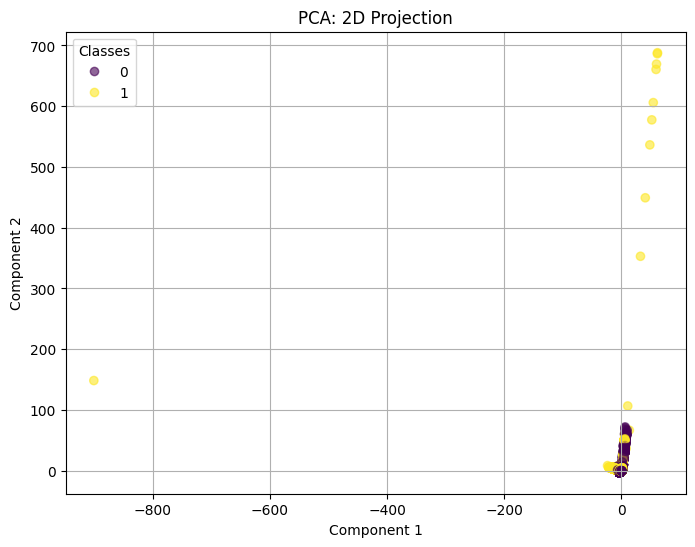

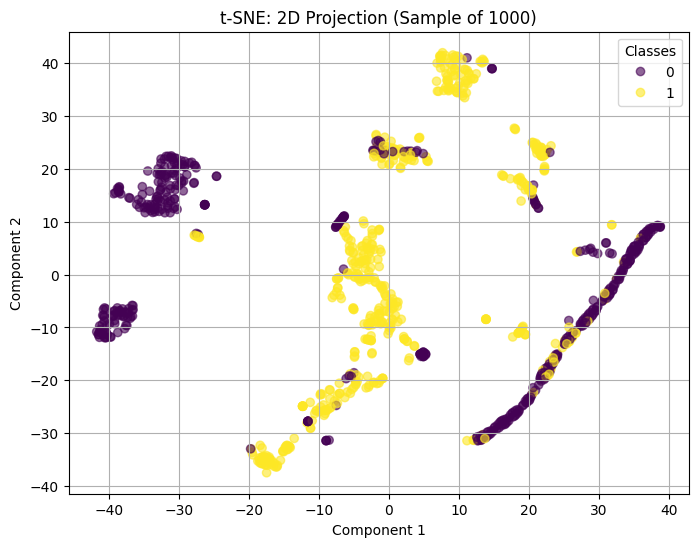

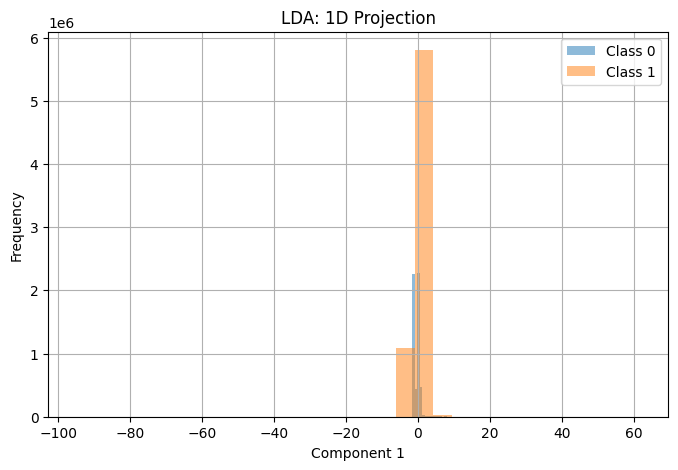

In [13]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# LDA (requires class labels)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_train_scaled, y_train)

# t-SNE (use subset for faster processing if dataset is large)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_train_scaled[:1000])
y_tsne = y_train[:1000]

# Plot function for 2D
def plot_2D(X, y, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.grid(True)
    plt.show()

# Visualizations
plot_2D(X_pca, y_train, "PCA: 2D Projection")
plot_2D(X_tsne, y_tsne, "t-SNE: 2D Projection (Sample of 1000)")

# LDA is 1D → plot as a histogram instead
plt.figure(figsize=(8, 5))
for label in sorted(y_train.unique()):
    plt.hist(X_lda[y_train == label], bins=30, alpha=0.5, label=f"Class {label}")
plt.title("LDA: 1D Projection")
plt.xlabel("Component 1")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()





In [8]:
# Train RCF (using IsolationForest as a local alternative, similar in behavior)
rcf_model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
rcf_model.fit(X_train_scaled)

# Predict anomaly scores
y_pred_test = rcf_model.predict(X_test_scaled)
y_pred_test = [1 if pred == -1 else 0 for pred in y_pred_test]  # Convert to binary (1=anomaly, 0=normal)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.99      0.63    692705
           1       0.91      0.08      0.15    863337

    accuracy                           0.49   1556042
   macro avg       0.69      0.54      0.39   1556042
weighted avg       0.71      0.49      0.36   1556042

Confusion Matrix:
 [[685554   7151]
 [792910  70427]]


Custom Threshold Classification Report:
               precision    recall  f1-score   support

           0       0.45      1.00      0.62    692705
           1       0.98      0.01      0.02    863337

    accuracy                           0.45   1556042
   macro avg       0.72      0.51      0.32   1556042
weighted avg       0.75      0.45      0.29   1556042

Custom Threshold Confusion Matrix:
 [[692531    174]
 [852851  10486]]


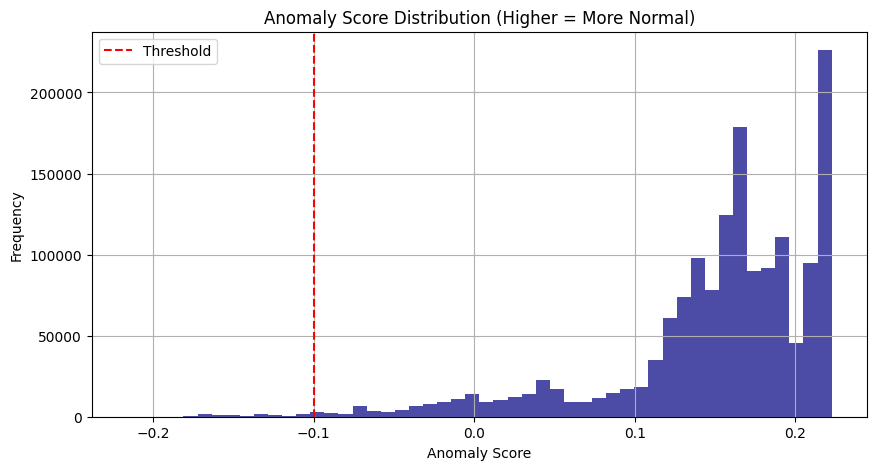

In [9]:
# Get anomaly scores (the higher, the more "normal")
anomaly_scores = rcf_model.decision_function(X_test_scaled)

# Define a custom threshold
threshold = -0.1  # Adjust this based on your domain or precision-recall tradeoff
y_pred_custom = [1 if score < threshold else 0 for score in anomaly_scores]

# Compare with standard prediction
print("Custom Threshold Classification Report:\n", classification_report(y_test, y_pred_custom))
print("Custom Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))

# Optional: visualize the distribution of anomaly scores
plt.figure(figsize=(10, 5))
plt.hist(anomaly_scores, bins=50, color='navy', alpha=0.7)
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.title("Anomaly Score Distribution (Higher = More Normal)")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Train an Isolation Forest model for anomaly detection
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
isolation_forest.fit(X_train_imputed)

# Predict anomalies (1 = anomaly, 0 = normal)
y_pred_test = isolation_forest.predict(X_test_clean)
y_pred_test = np.where(y_pred_test == -1, 1, 0)

# Evaluate model performance
print("Classification Report:\n", classification_report(y_test_clean, y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_clean, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.97      0.64    692705
           1       0.88      0.16      0.27    863337

    accuracy                           0.52   1556042
   macro avg       0.68      0.57      0.46   1556042
weighted avg       0.70      0.52      0.44   1556042


Confusion Matrix:
 [[673873  18832]
 [726696 136641]]


In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 5.2 MB/s eta 0:00:00


In [11]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier

In [12]:
# Initialize XGBoost classifier
xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# Train the model
xgb_clf.fit(X_train_scaled, y_train)

# Predict on the clean test set
y_pred_xgb = xgb_clf.predict(X_test_clean)

# Evaluation
print("XGBoost Classification Report:\n", classification_report(y_test_clean, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_clean, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:46:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.00      0.00    692705
           1       0.56      1.00      0.71    863337

    accuracy                           0.56   1556042
   macro avg       0.69      0.50      0.36   1556042
weighted avg       0.67      0.56      0.40   1556042


Confusion Matrix:
 [[   666 692039]
 [   151 863186]]


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Scale the imputed data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Define input dimension
input_dim = X_train_scaled.shape[1]

# Build the Autoencoder model
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dropout(0.2)(encoded)  # Optional: helps prevent overfitting
encoded = Dense(16, activation='relu')(encoded)
bottleneck = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(bottleneck)
decoded = Dropout(0.2)(decoded)  # Optional: helps generalize better
decoded = Dense(32, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

# Define and compile model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
optimizer = Adam(learning_rate=0.001)
autoencoder.compile(optimizer=optimizer, loss='mse')

# Set up early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Train the model
history = autoencoder.fit(
    X_train_scaled, X_train_scaled,
    epochs=50,
    batch_size=64,  # Increased for better performance with large data
    validation_data=(X_val_scaled, X_val_scaled),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
194506/194506 ━━━━━━━━━━━━━━━━━━━━ 334s 2ms/step - loss: 0.2681 - val_loss: 1.1685
Epoch 2/50
194506/194506 ━━━━━━━━━━━━━━━━━━━━ 331s 2ms/step - loss: 0.1455 - val_loss: 1.3425
Epoch 3/50
194506/194506 ━━━━━━━━━━━━━━━━━━━━ 332s 2ms/step - loss: 0.0772 - val_loss: 1.1042
Epoch 4/50
194506/194506 ━━━━━━━━━━━━━━━━━━━━ 331s 2ms/step - loss: 0.2894 - val_loss: 1.1218
Epoch 5/50
194506/194506 ━━━━━━━━━━━━━━━━━━━━ 328s 2ms/step - loss: 0.0981 - val_loss: 1.0905
Epoch 6/50
194506/194506 ━━━━━━━━━━━━━━━━━━━━ 337s 2ms/step - loss: 0.1748 - val_loss: 1.0751
Epoch 7/50
194506/194506 ━━━━━━━━━━━━━━━━━━━━ 331s 2ms/step - loss: 0.0863 - val_loss: 1.1208
Epoch 8/50
194506/194506 ━━━━━━━━━━━━━━━━━━━━ 325s 2ms/step - loss: 0.2413 - val_loss: 1.1162
Epoch 9/50
194506/194506 ━━━━━━━━━━━━━━━━━━━━ 325s 2ms/step - loss: 0.1405 - val_loss: 1.1021
Epoch 10/50
194506/194506 ━━━━━━━━━━━━━━━━━━━━ 333s 2ms/step - loss: 0.0742 - val_loss: 1.1125
Epoch 11/50
194506/194506 ━━━━━━━━━━━━━━━━━━━━ 332s 2ms/ste

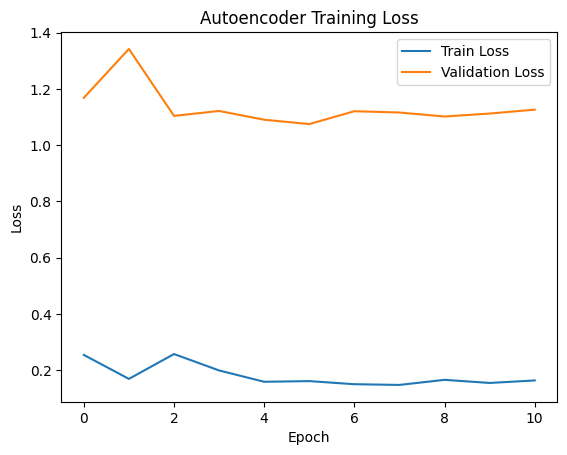

48627/48627 ━━━━━━━━━━━━━━━━━━━━ 36s 738us/step
Autoencoder Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.98      0.63    692705
           1       0.83      0.07      0.14    863337

    accuracy                           0.48   1556042
   macro avg       0.64      0.53      0.38   1556042
weighted avg       0.66      0.48      0.35   1556042


Confusion Matrix:
 [[679352  13353]
 [798887  64450]]


In [ ]:
# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Compute reconstruction error on test set
reconstructions = autoencoder.predict(X_test_scaled)
mse = np.mean(np.power(X_test_scaled - reconstructions, 2), axis=1)

# Define threshold (e.g., 95th percentile)
threshold = np.percentile(mse, 95)

# Predict anomalies
y_pred_autoencoder = (mse > threshold).astype(int)

# Evaluate predictions
print("Autoencoder Classification Report:\n", classification_report(y_test_clean, y_pred_autoencoder))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_clean, y_pred_autoencoder))